### Ejercicio regresión polinomial

#### Utilizando los modelos de regresión vistos hasta ahora, genera el modelo que mejor se adapte a los datos adjuntos. La pregunta objetivo es: ¿Cuál es la longitud del pez bluegill en función de su edad?


#### En 1981, 78 diferentes peces bluegills fueron aleatoriamente caracterizados según su longitud y edad de un lago de Minnesota. Los investigadores midieron y grabaron los datos que se adjuntan. 

In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

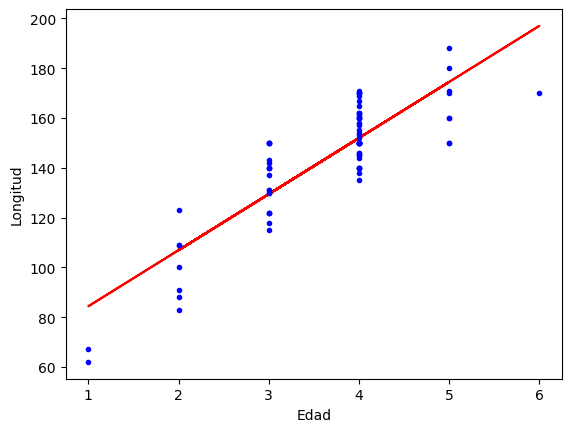

In [7]:
# cargar datos
df = pd.read_csv("Datos mojarra americana.txt", delimiter='\t')
# train/test
x = np.reshape(df['age'].values, (len(df), 1))
y = np.reshape(df['length'].values, (len(df), 1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
# regresión lineal
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
# visualizar datos de la regresión lineal
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(x, y, 'b.')
plt.xlabel("Edad")
plt.ylabel("Longitud")
plt.show()

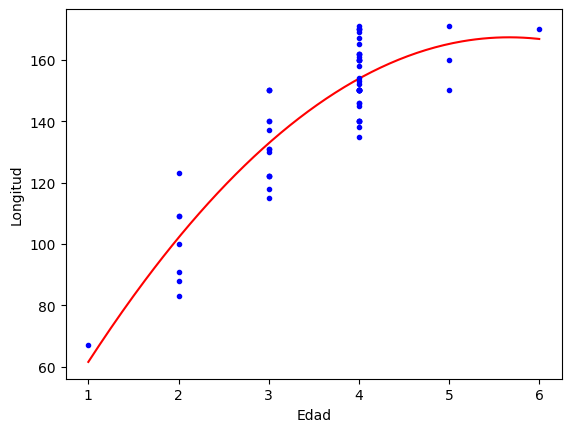

In [10]:
# regresión polinomial
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
# predicciones
X_new = np.linspace(1, 6, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
# visualizar datos de la regresión polinomial
plt.plot(X_new, y_new, color="r")
plt.plot(x_train, y_train, "b.")
plt.xlabel("Edad")
plt.ylabel("Longitud")
plt.show()